In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

## 1d noisy data

In [ ]:
# Define the shape of the matrix
rows = 100
cols = 1

# Define the range of the random numbers
low = 0
high = 100

# Create the matrix
X = np.random.uniform(low, high, (rows, cols))

y = np.random.uniform(low, high, (rows, cols))

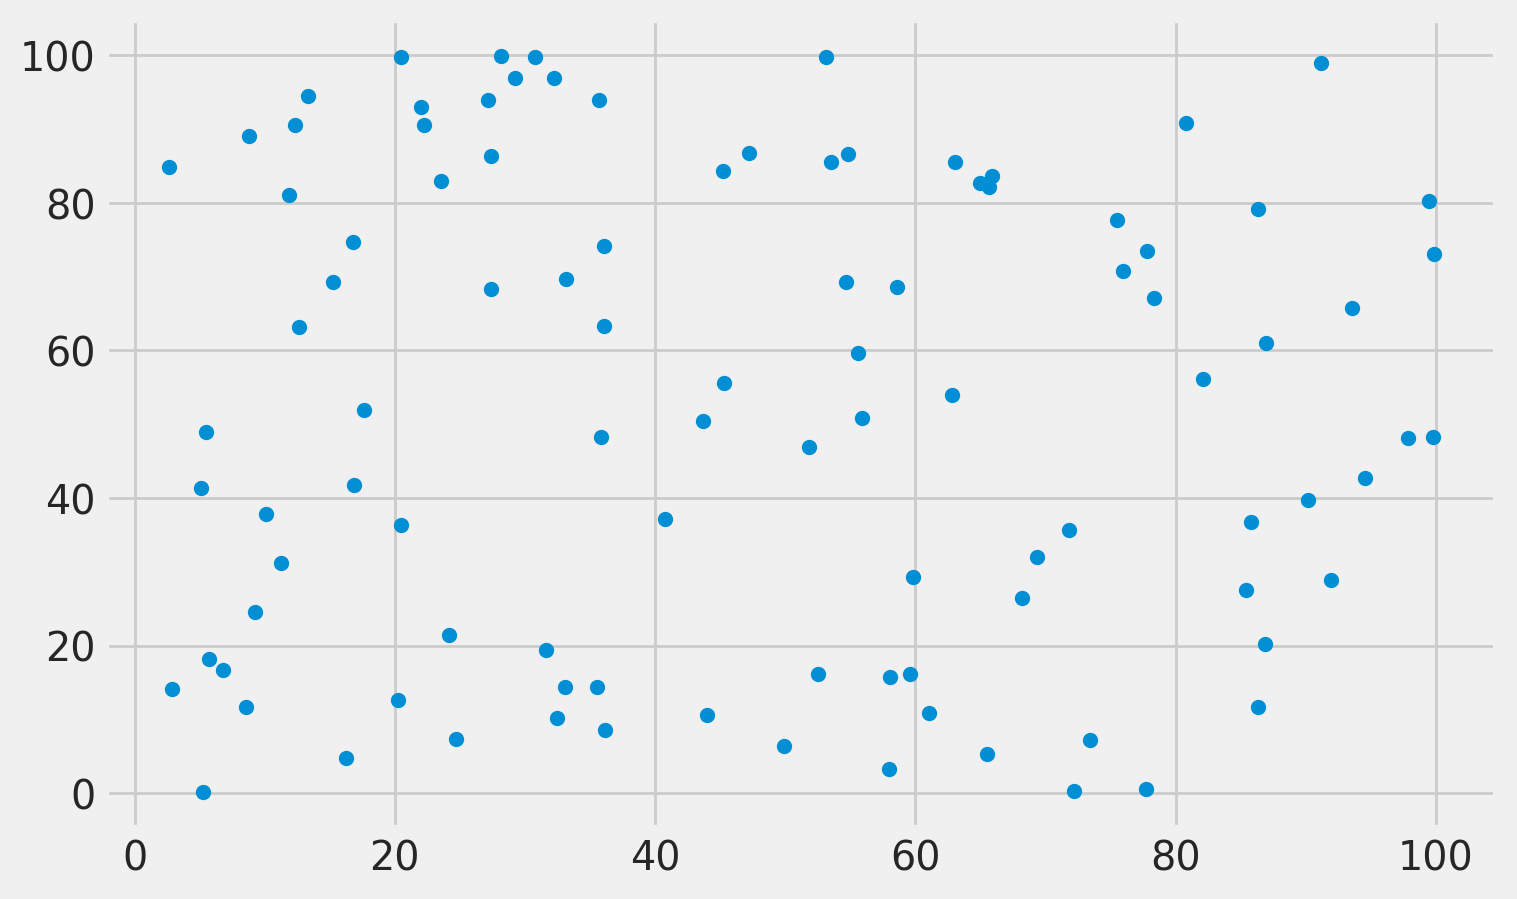

In [ ]:
plt.scatter(X, y)

## 1. Linear Model

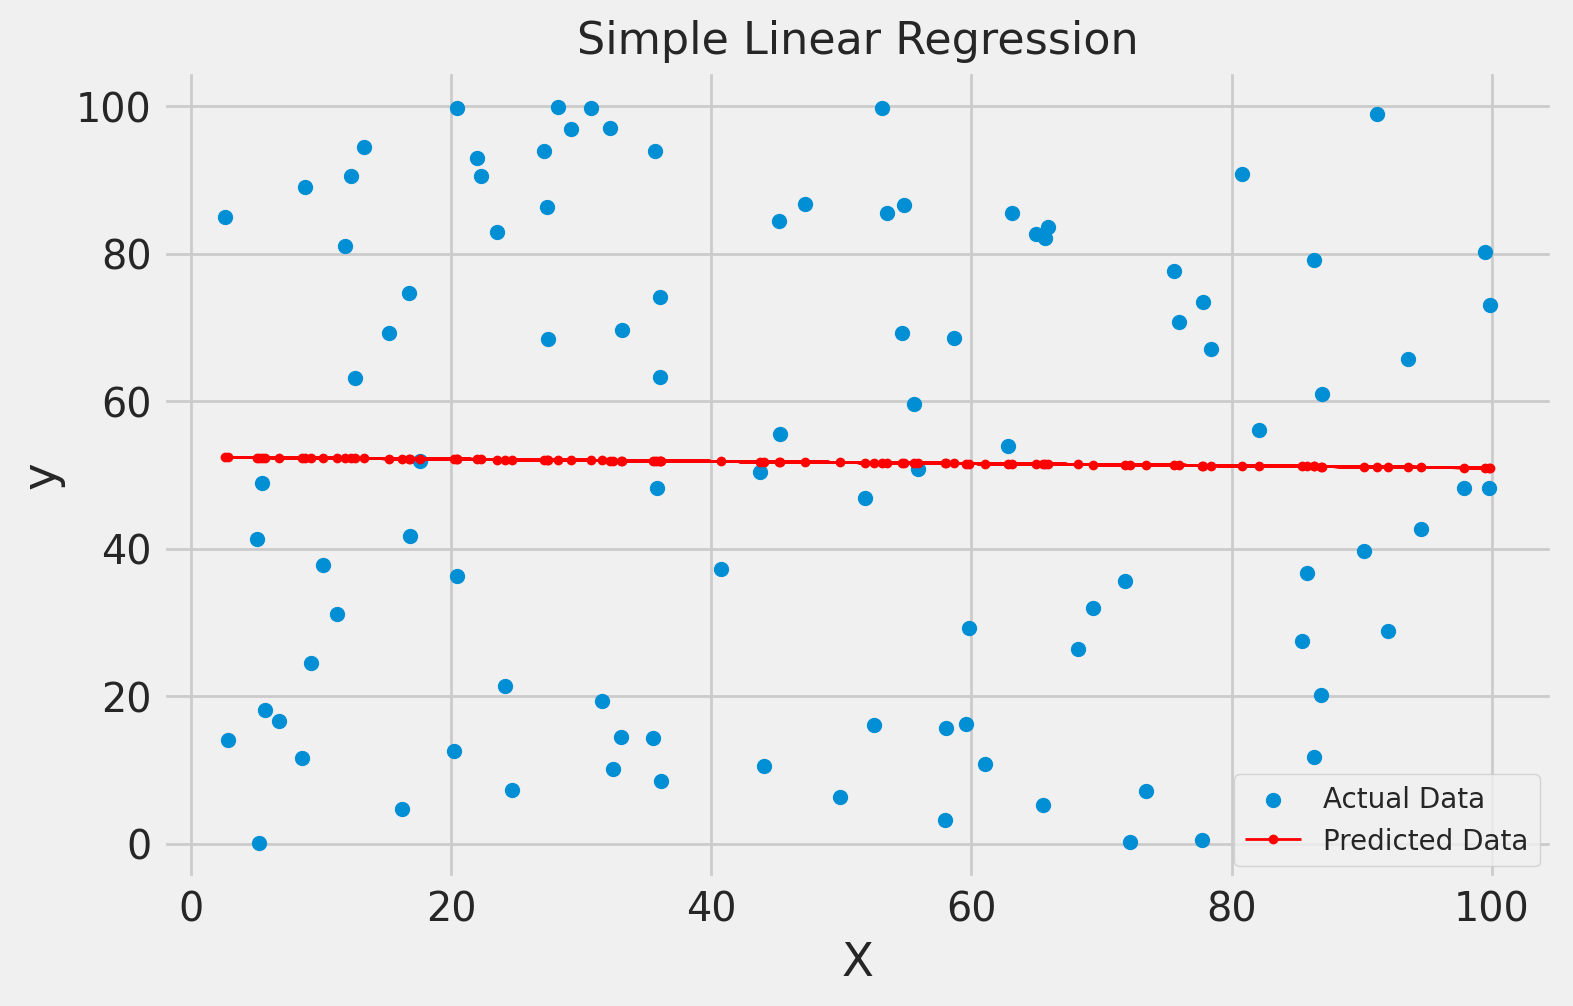

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (m) and intercept (b) of the fitted line
m = model.coef_[0][0]
b = model.intercept_[0]

# Generate predictions using the model
y_pred = model.predict(X)

# Plot the actual y values and the predicted values
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## 2. Decision Tree

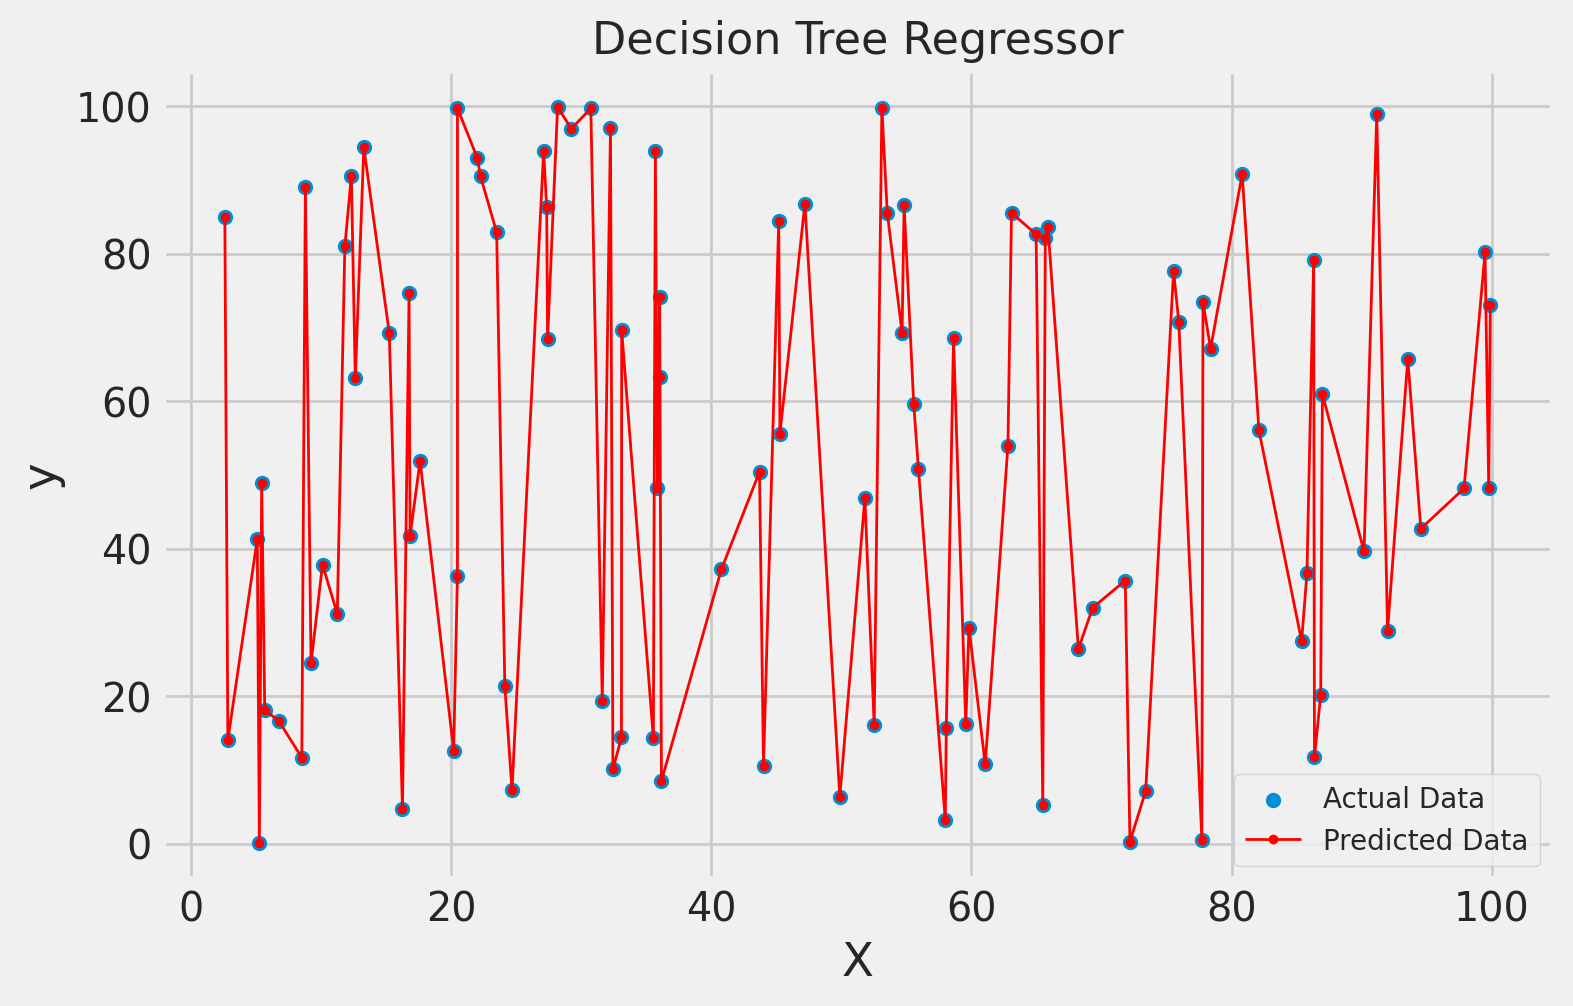

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1)
model.fit(X, y)

# Generate predictions using the model
y_pred = model.predict(X)

# Sort X and y_pred for plotting purposes
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual y values and the predicted values
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

### Reducing overfitting

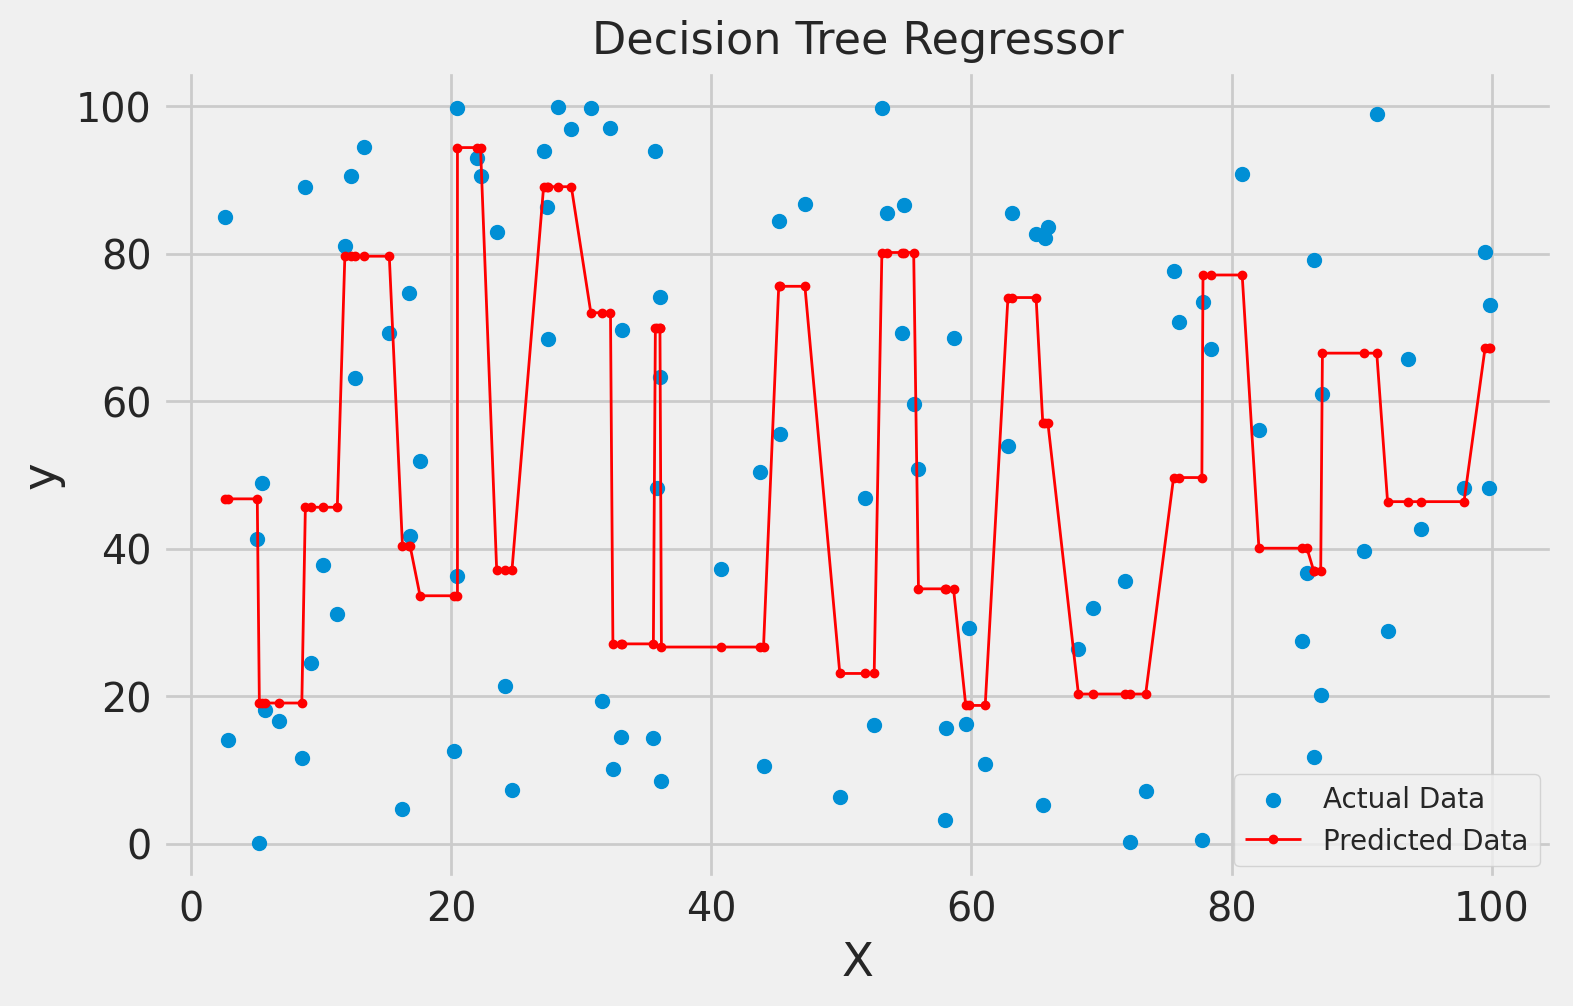

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=3)
model.fit(X, y)

# Generate predictions using the model
y_pred = model.predict(X)

# Sort X and y_pred for plotting purposes
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual y values and the predicted values
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

### Computing confidence intervals

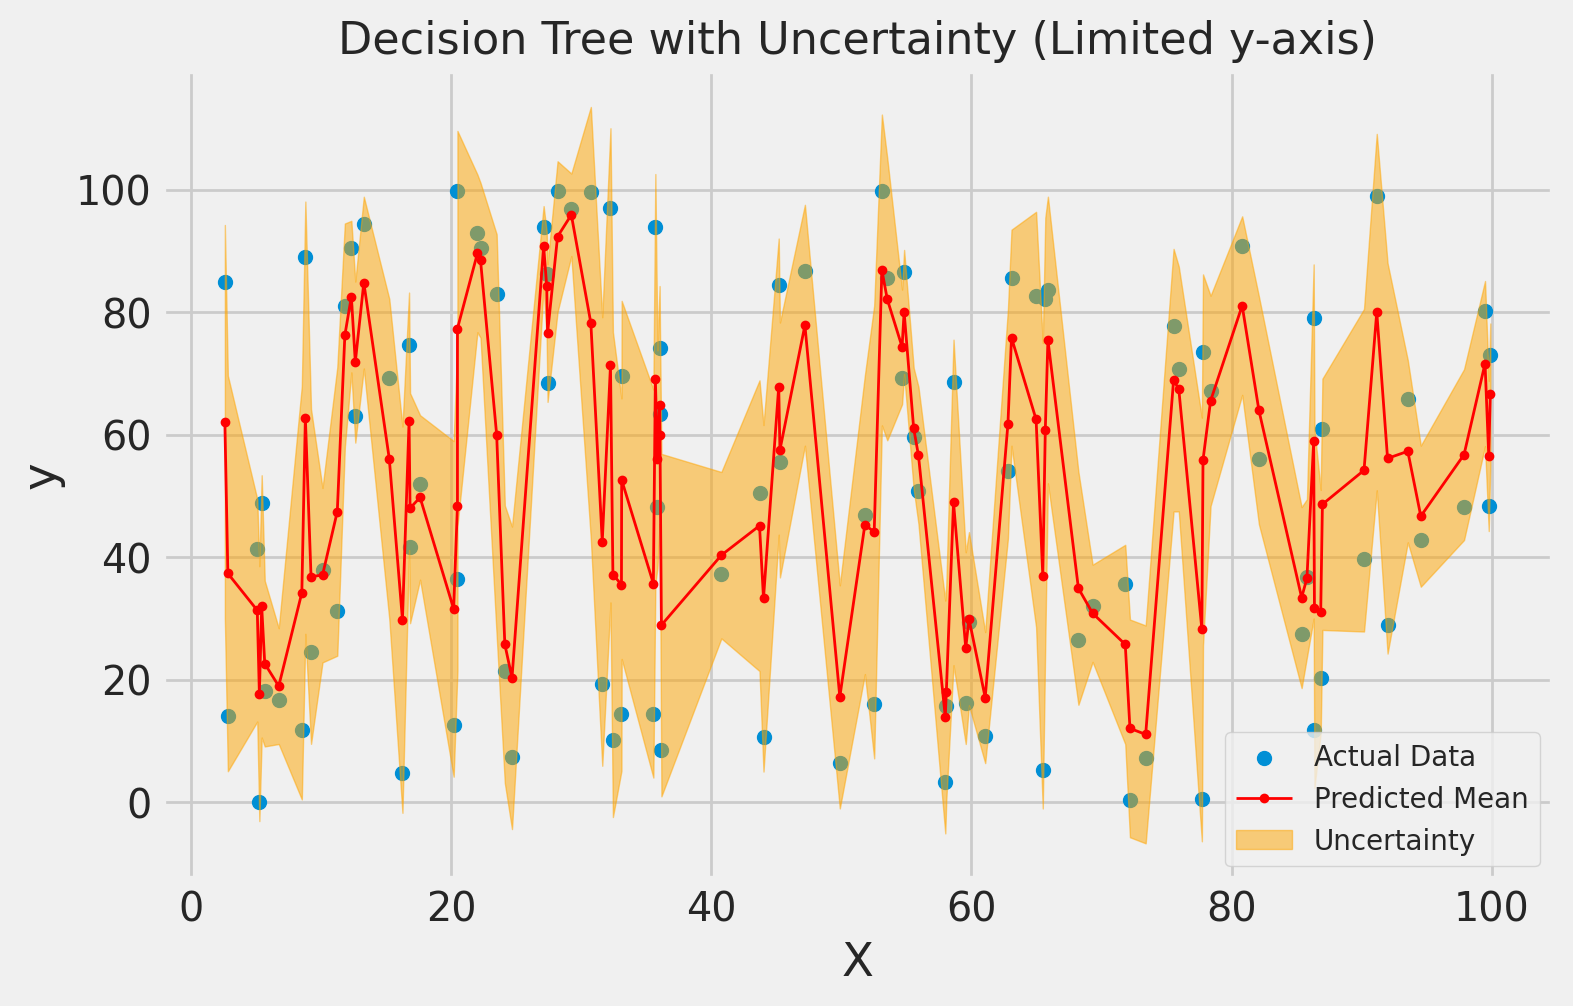

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a list to store predictions from each decision tree
num_trees = 100  # Number of decision trees to create
predictions = []

for _ in range(num_trees):
    # Create a bootstrapped sample from the original data
    bootstrap_indices = np.random.choice(rows, rows, replace=True)
    X_bootstrapped = X[bootstrap_indices]
    y_bootstrapped = y[bootstrap_indices]

    # Create and fit the Decision Tree Regressor model with pruning
    model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1)
    model.fit(X_bootstrapped, y_bootstrapped)

    # Generate predictions using the model
    y_pred = model.predict(X)
    predictions.append(y_pred)

# Calculate mean and standard deviation of the predictions across all trees
predictions_mean = np.mean(predictions, axis=0)
predictions_std = np.std(predictions, axis=0)

# Sort X and predictions_mean for plotting purposes
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_mean_sorted = predictions_mean[sorted_indices]
predictions_std_sorted = predictions_std[sorted_indices]

# Plot the actual y values, the predicted mean, and the uncertainty range
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, predictions_mean_sorted, color='red', label='Predicted Mean')
plt.fill_between(X_sorted[:, 0], predictions_mean_sorted - predictions_std_sorted,
                 predictions_mean_sorted + predictions_std_sorted, color='orange', alpha=0.5, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree with Uncertainty (Limited y-axis)')
plt.legend()
plt.show()

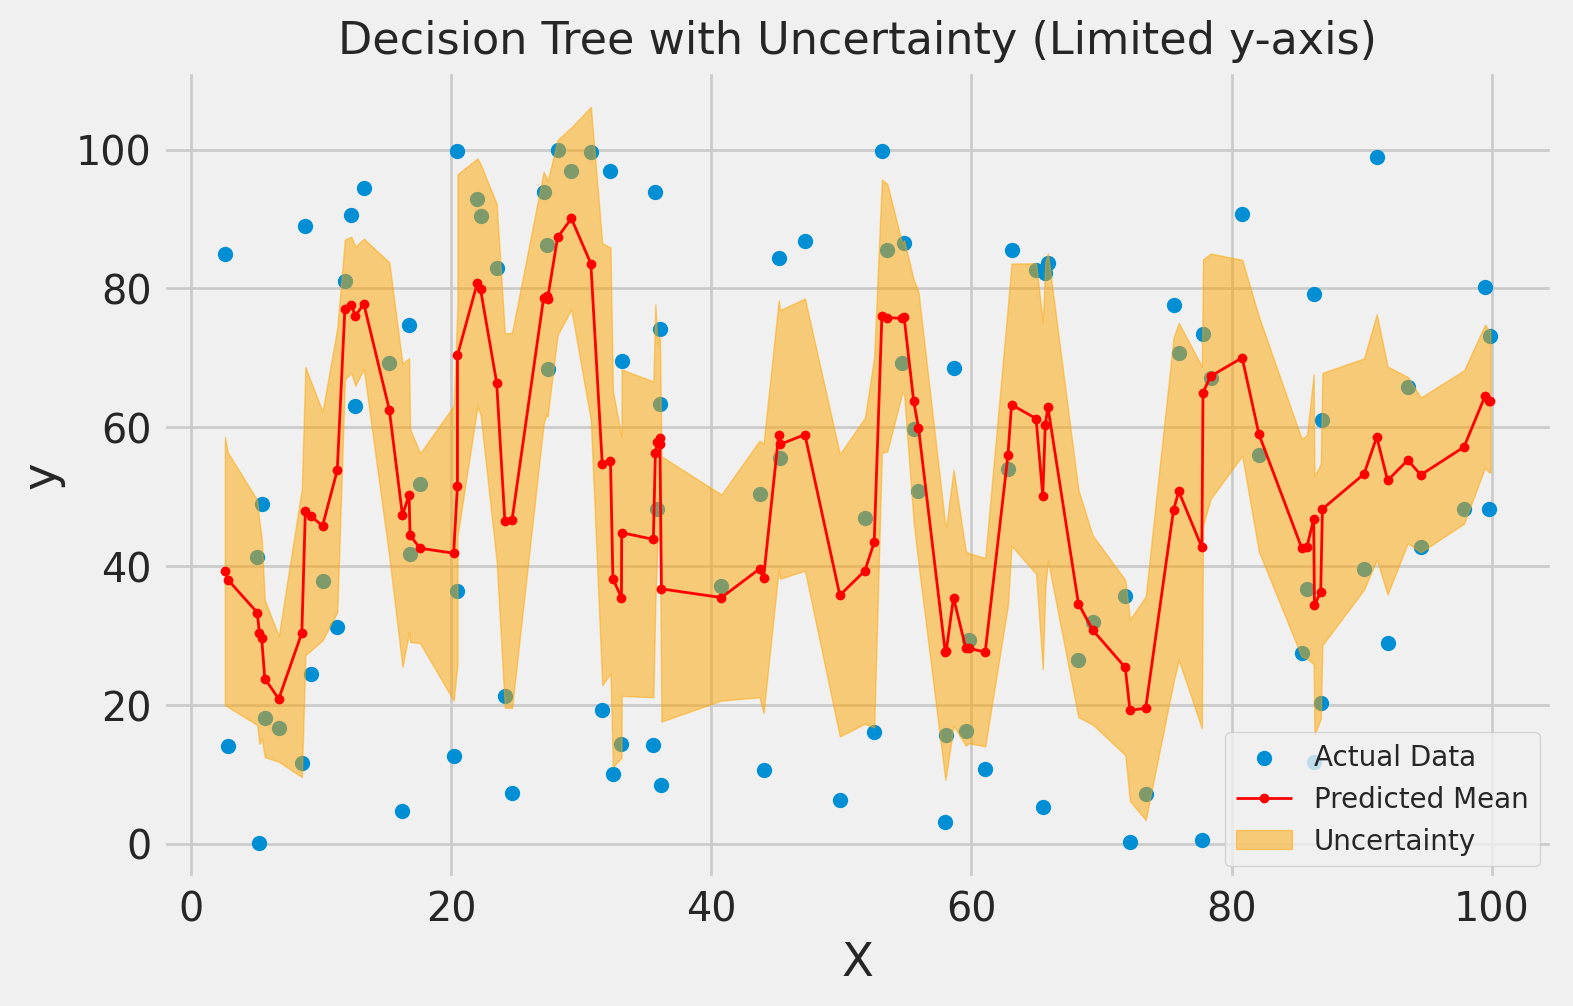

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a list to store predictions from each decision tree
num_trees = 100  # Number of decision trees to create
predictions = []

for _ in range(num_trees):
    # Create a bootstrapped sample from the original data
    bootstrap_indices = np.random.choice(rows, rows, replace=True)
    X_bootstrapped = X[bootstrap_indices]
    y_bootstrapped = y[bootstrap_indices]

    # Create and fit the Decision Tree Regressor model with pruning
    model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=3)
    model.fit(X_bootstrapped, y_bootstrapped)

    # Generate predictions using the model
    y_pred = model.predict(X)
    predictions.append(y_pred)

# Calculate mean and standard deviation of the predictions across all trees
predictions_mean = np.mean(predictions, axis=0)
predictions_std = np.std(predictions, axis=0)

# Sort X and predictions_mean for plotting purposes
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_mean_sorted = predictions_mean[sorted_indices]
predictions_std_sorted = predictions_std[sorted_indices]

# Plot the actual y values, the predicted mean, and the uncertainty range
plt.scatter(X, y, label='Actual Data')
plt.plot(X_sorted, predictions_mean_sorted, color='red', label='Predicted Mean')
plt.fill_between(X_sorted[:, 0], predictions_mean_sorted - predictions_std_sorted,
                 predictions_mean_sorted + predictions_std_sorted, color='orange', alpha=0.5, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree with Uncertainty (Limited y-axis)')
plt.legend()
plt.show()

## 3. K Means Clustering

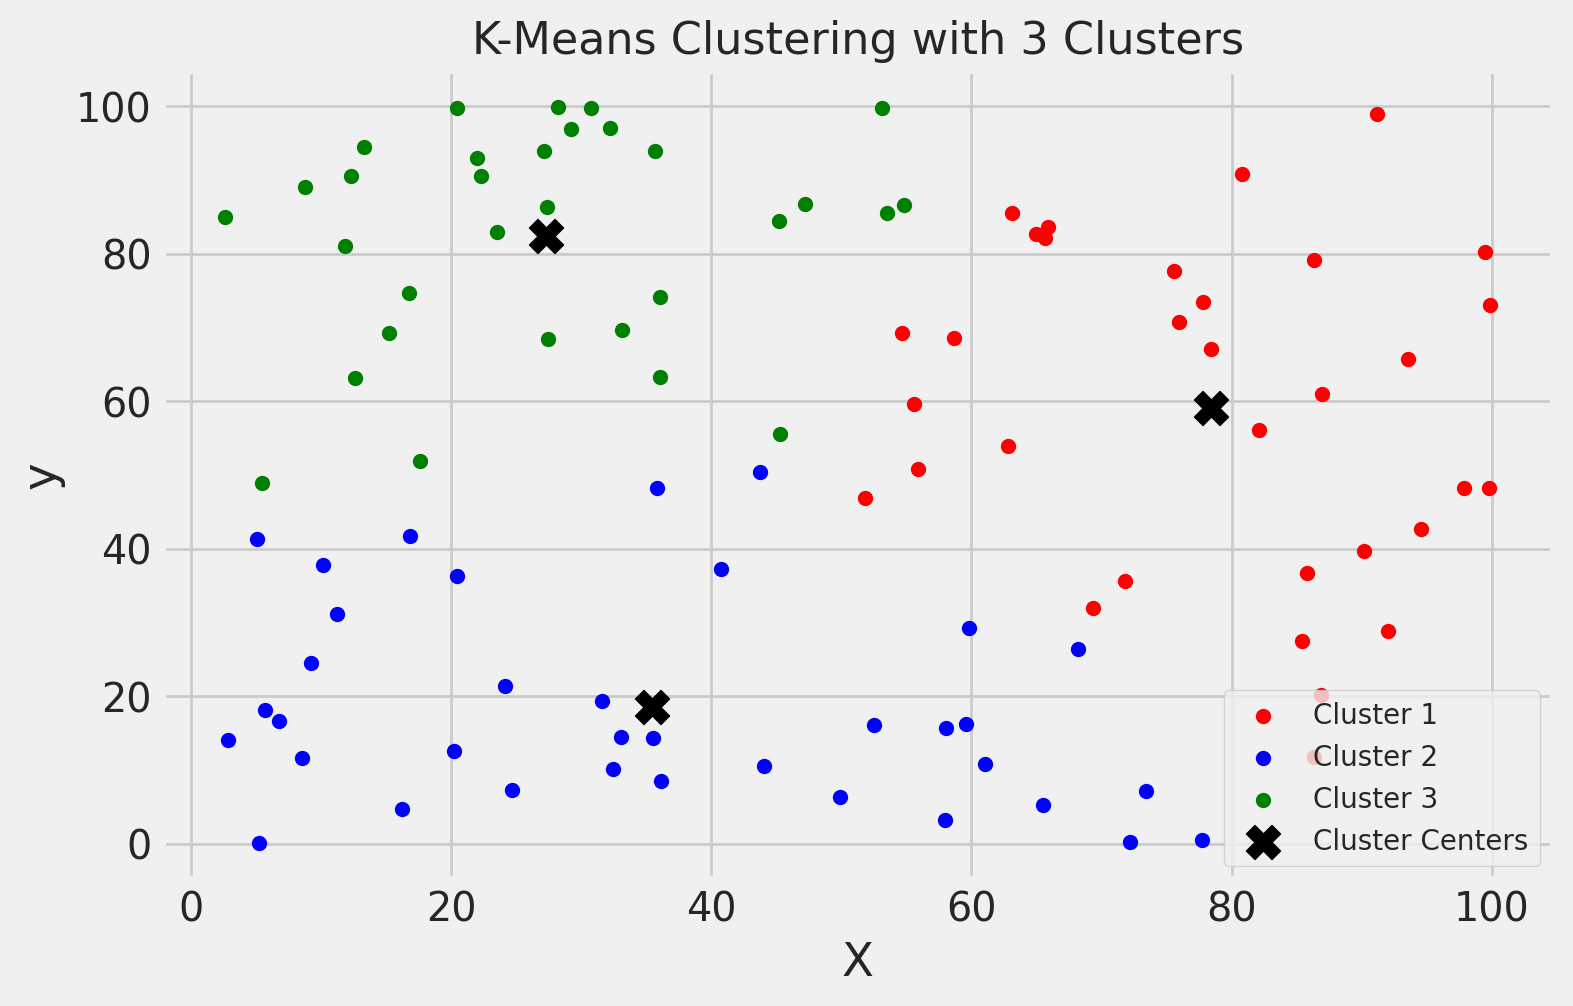

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Combine X and y to create the dataset
dataset = np.concatenate((X, y), axis=1)

# Number of clusters (you can adjust this based on your needs)
num_clusters = 3

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(dataset)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Separate the data points based on their cluster labels
clustered_data = [dataset[labels == i] for i in range(num_clusters)]

# Plot the clustered data
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']  # Add more colors if needed
for i in range(num_clusters):
    plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f'Cluster {i+1}')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=150, label='Cluster Centers')

plt.xlabel('X')
plt.ylabel('y')
plt.title(f'K-Means Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()